In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from src.components.model_prediction import evaluation_metrics, predict_and_plot
import yfinance as yf
import numpy as np
from src.components.data_preprocessor import MinMaxScaling, PreProcessor
from src.components.data_splitter import CustomDataSplittingStrategy, DataSplitter, create_sequences
from src.components.model_building import GRUModelBuilder, LSTMModelBuilder, ModelBuilder, RNNMdelBuilder
from src.pipeline.analysis_pipeline import analysis_pipeline


In [95]:
data = pd.read_csv('D:\coding\ml\stock-price-predictor\src\components\data\AAPL_stock_data.csv')


         Date  Adj Close      Close       High        Low       Open  \
0  2019-11-07  62.947399  64.857498  65.087502  64.527496  64.684998   
1  2019-11-08  63.119667  65.035004  65.110001  64.212502  64.672501   
2  2019-11-11  63.619492  65.550003  65.617500  64.570000  64.574997   
3  2019-11-12  63.561279  65.489998  65.697502  65.230003  65.387497   
4  2019-11-13  64.170296  66.117500  66.195000  65.267502  65.282501   

      Volume  MA50  MA200  Daily Return            date  
0   94940400   NaN    NaN           NaN  00:00:00+00:00  
1   69986400   NaN    NaN      0.002737  00:00:00+00:00  
2   81821200   NaN    NaN      0.007919  00:00:00+00:00  
3   87388800   NaN    NaN     -0.000915  00:00:00+00:00  
4  102734400   NaN    NaN      0.009582  00:00:00+00:00  
Performing basic Data Inspection
data types and non-null counts: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---

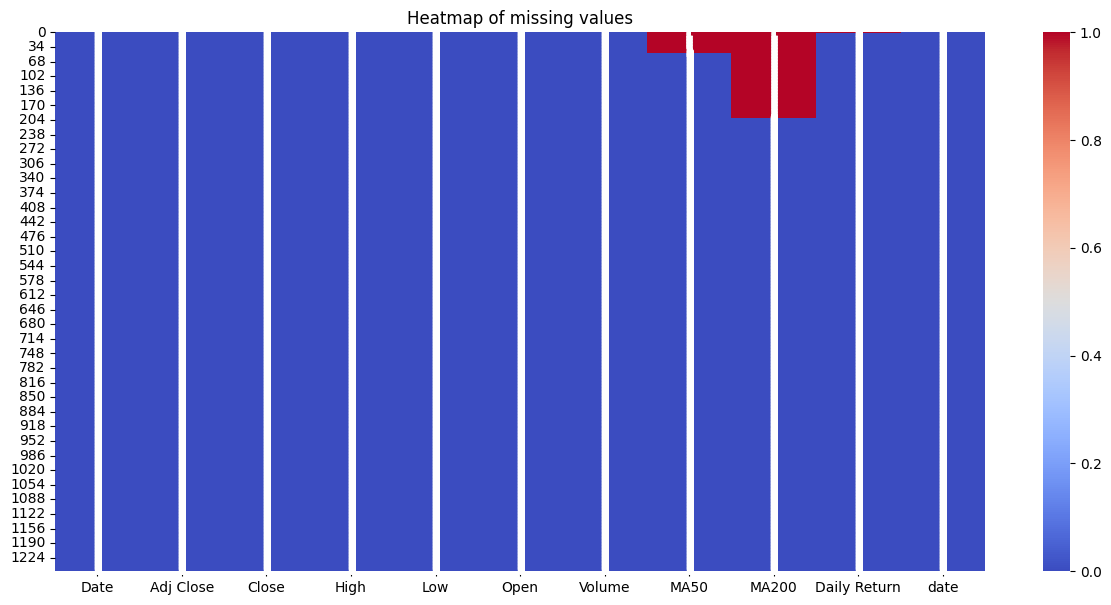

------------------------------------------------------------------------------------
Performing visualization on various aspects of the dataset
___________________________________________________________
------------------Closing price visualization---------------------


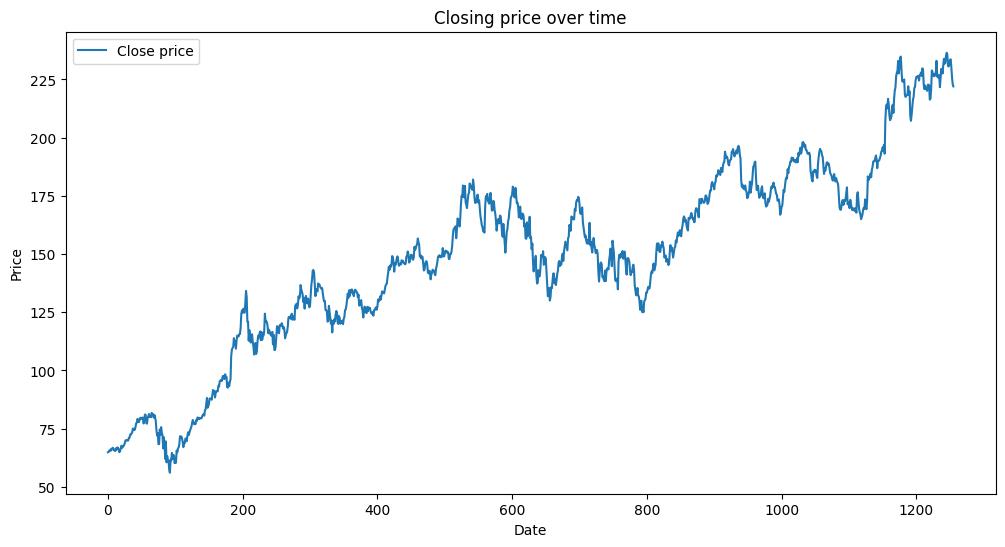

------------------Volumne visualization---------------------


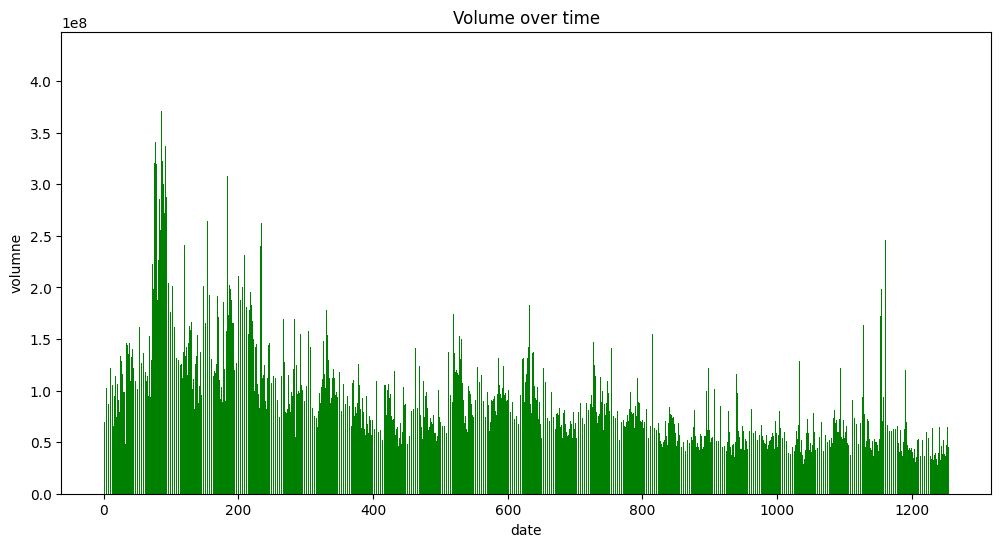

------------------Moving average visualization---------------------


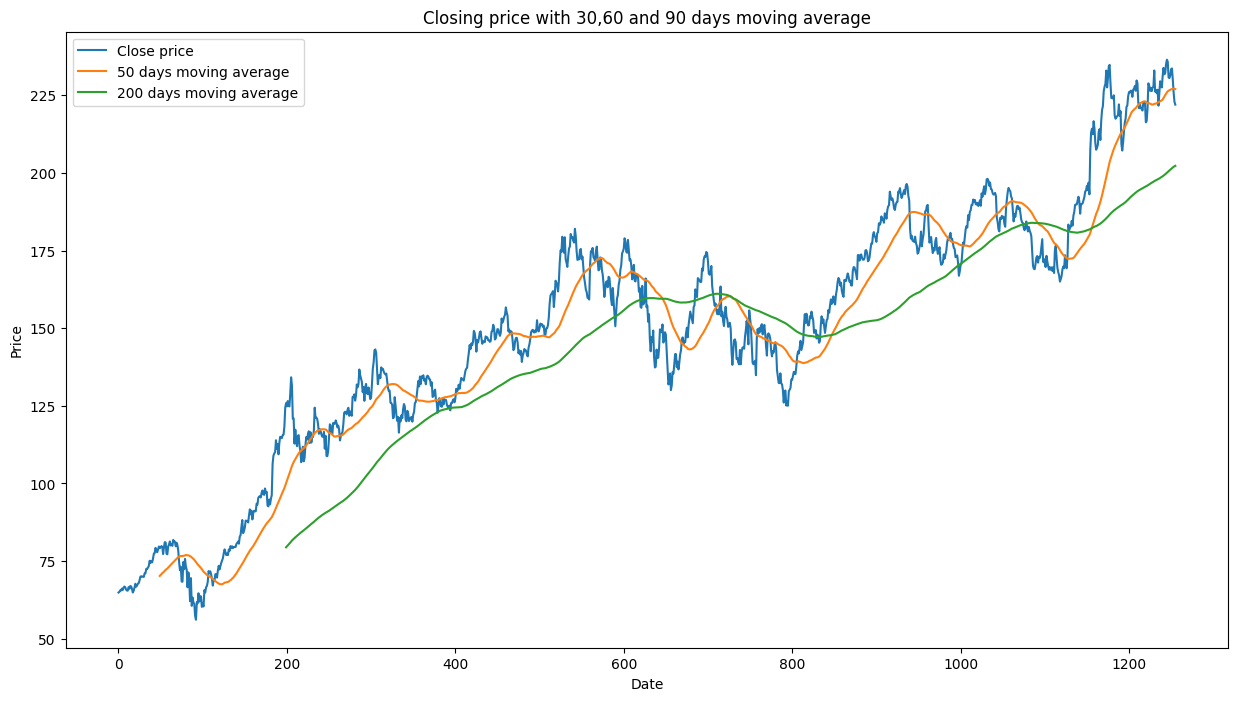

------------------Daily returns visualization---------------------


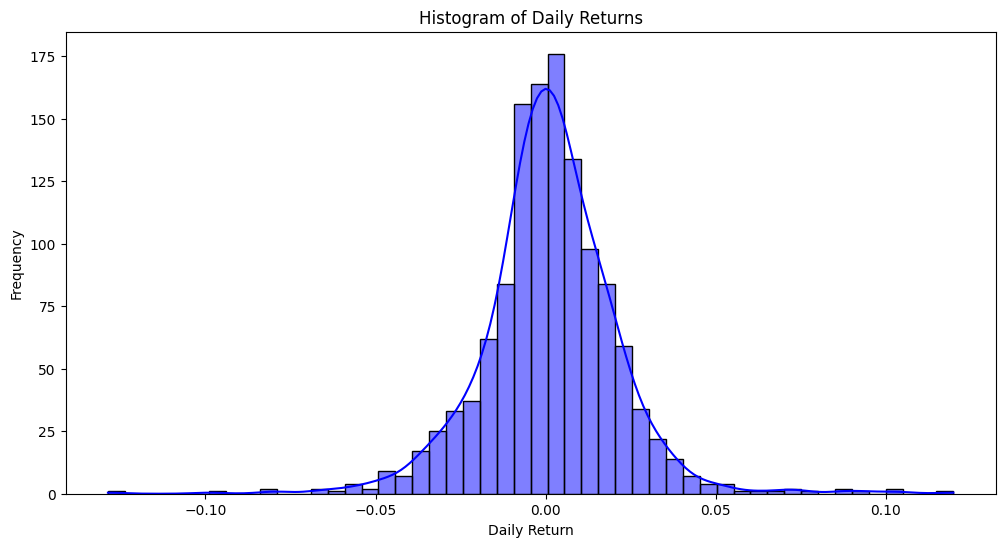

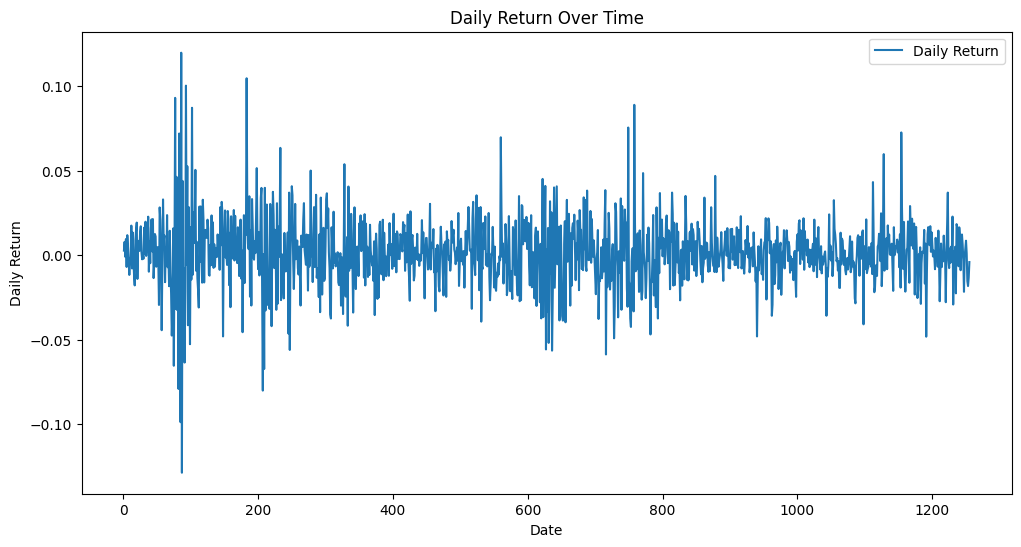

------------------correlation between closing price and volume visualization---------------------
Correlation between Close Price and Volume:
           Close    Volume
Close   1.000000 -0.602823
Volume -0.602823  1.000000


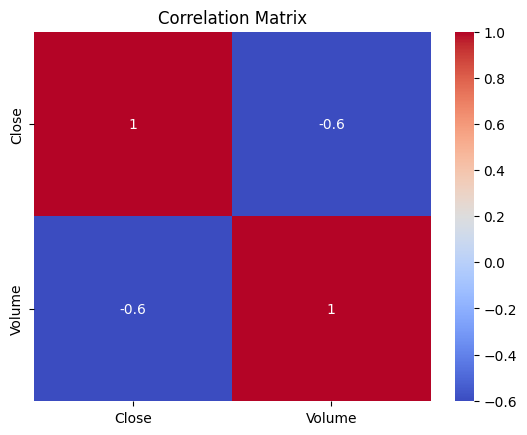

In [124]:
from src.pipeline.analysis_pipeline import analysis_pipeline
analysis_pipeline(data)

In [139]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(data[['Close']])
scaler

MinMaxScaler()

In [140]:
import joblib
scaler_file = "scaler.pkl"
joblib.dump(scaler,scaler_file)

['scaler.pkl']

                        Date  Adj Close      Close       High        Low  \
0  2019-11-07 00:00:00+00:00  62.947399  64.857498  65.087502  64.527496   
1  2019-11-08 00:00:00+00:00  63.119667  65.035004  65.110001  64.212502   
2  2019-11-11 00:00:00+00:00  63.619492  65.550003  65.617500  64.570000   
3  2019-11-12 00:00:00+00:00  63.561279  65.489998  65.697502  65.230003   
4  2019-11-13 00:00:00+00:00  64.170296  66.117500  66.195000  65.267502   

        Open     Volume  
0  64.684998   94940400  
1  64.672501   69986400  
2  64.574997   81821200  
3  65.387497   87388800  
4  65.282501  102734400  
(1256, 1)


c:\Users\aumpa\anaconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Mean Squared Error: 13.698341741164782
Mean Absolute Error: 2.881163040796917
R^2 Score: 0.9749088124803692
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


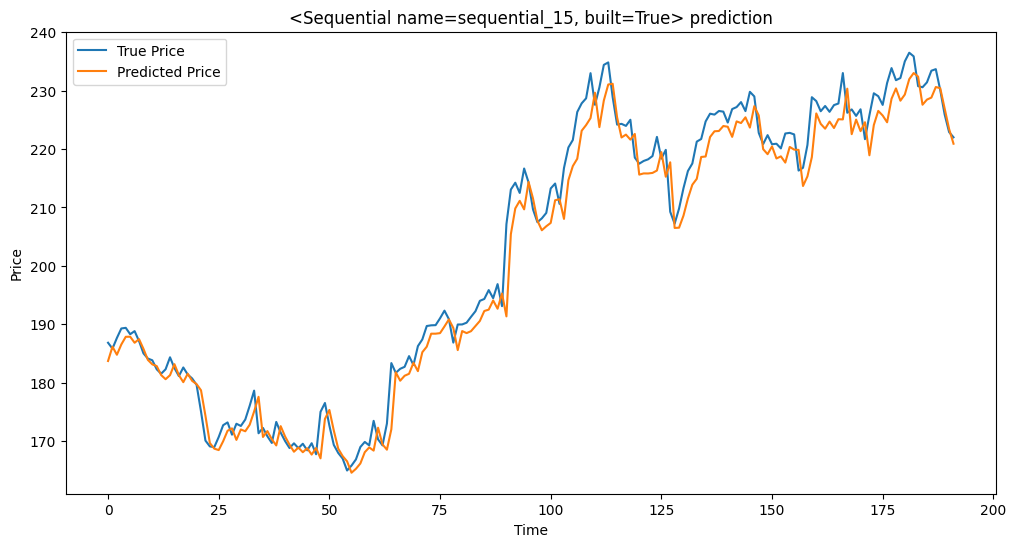

the final model is <Sequential name=sequential_15, built=True>


In [154]:



def training_pipeline(data):
    print(data.head())

    #preprocessing the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['Close']])
    print(scaled_data.shape)

    # Splitting the data
    splitter = DataSplitter(strategy=CustomDataSplittingStrategy())
    X_train,y_train,X_test,y_test = splitter.split(scaled_data)

    #making a dictionary to store models

    #building models
    model_builder = ModelBuilder(LSTMModelBuilder())
    model = model_builder.compile_model(X_train=X_train)
    history=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))
    mse,mae,r2 = evaluation_metrics(X_test,y_test,scaler,model)
    predict_and_plot(model,X_test,y_test,scaler,title=f"{model} prediction")
    #building dictonaries to store history of trained model

    #iterating over the models from model_history and fitting and performing evaluation of the data
    # for key,model in predict_models.items():
    #     print()
    #     print(f"begining model training for {key}")
    #     print("-----------------------------------------------")
    #     print(model.summary())
    #     model_history[f"{key}_history"] = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))
    #     print(f"model history completed for {key}")
    #     mse,mae,r2 = evaluation_metrics(X_test,y_test,scaler,model)
    #     print(f"{key} => {mse}")
    #     print(f"{key} => {mae}")
    #     print(f"{key} => {r2}")
    #     print("========================================================================")
    #     predict_and_plot(model,X_test,y_test,scaler,title=f"{key} prediction")

    #     max_r2[key] = r2
    # key_max = max(max_r2,key=lambda x: max_r2[x])
    # print(f"the model with max r2 is {key_max}")

    # model = predict_models['lstm_model']
    return model


ticker = "AAPL"  # Replace with desired ticker symbol
data = pd.read_csv("D:/coding/ml/stock-price-predictor/src/components/data/AAPL_stock_data.csv")
model = training_pipeline(data=data)
print(f"the final model is {model}")

In [156]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [ ]:
model.summary()
# model.save('D:/coding/ml/stock-price-predictor/src/model/stock_price_prediction_model.h5')


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [147]:
print(data.head())

#preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close']])
print(scaled_data.shape)

                        Date  Adj Close      Close       High        Low  \
0  2019-11-07 00:00:00+00:00  62.947399  64.857498  65.087502  64.527496   
1  2019-11-08 00:00:00+00:00  63.119667  65.035004  65.110001  64.212502   
2  2019-11-11 00:00:00+00:00  63.619492  65.550003  65.617500  64.570000   
3  2019-11-12 00:00:00+00:00  63.561279  65.489998  65.697502  65.230003   
4  2019-11-13 00:00:00+00:00  64.170296  66.117500  66.195000  65.267502   

        Open     Volume  
0  64.684998   94940400  
1  64.672501   69986400  
2  64.574997   81821200  
3  65.387497   87388800  
4  65.282501  102734400  
(1256, 1)


In [148]:
model.summary()
# model.save('D:/coding/ml/stock-price-predictor/src/model/stock_price_prediction_model.h5')

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [157]:
import tensorflow as tf
new_model = tf.keras.models.load_model('D:/coding/ml/stock-price-predictor/src/model/stock_price_prediction_model.h5')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,303 (473.84 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,303 (473.84 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[np.float32(57.0176), np.float32(56.780235), np.float32(56.485085), np.float32(56.1634), np.float32(55.858006), np.float32(55.600105), np.float32(55.406677), np.float32(55.282692), np.float32(55.224583), np.float32(55.223682)]


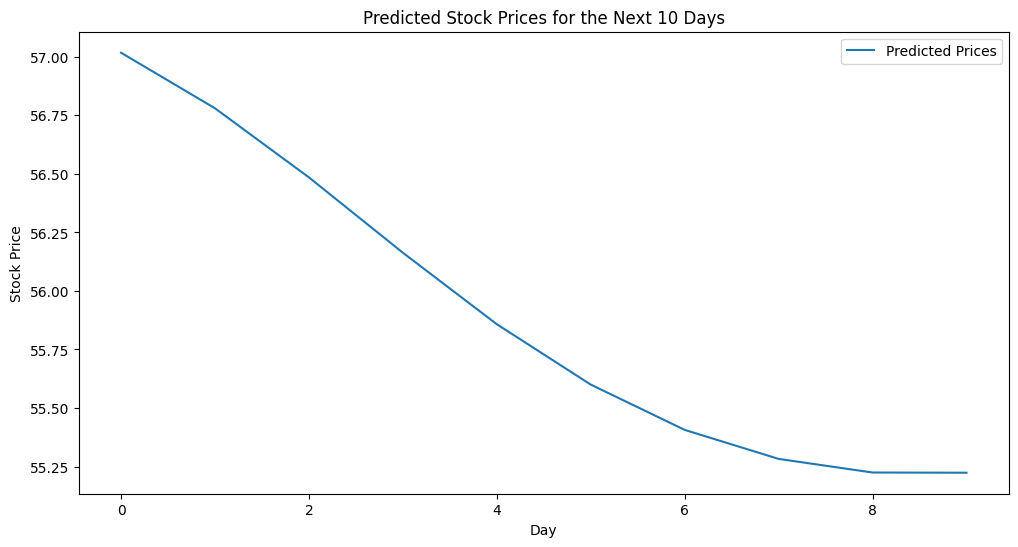

[np.float32(57.0176), np.float32(56.780235), np.float32(56.485085), np.float32(56.1634), np.float32(55.858006), np.float32(55.600105), np.float32(55.406677), np.float32(55.282692), np.float32(55.224583), np.float32(55.223682)]


In [161]:
import matplotlib.pyplot as plt
def predict_for_future(model,scaled_data,days_to_predict,time_step):
    # Get the last 60 days of data
    model.summary()
    last_sequence = scaled_data[-time_step:]
    last_sequence = last_sequence.reshape((1,time_step,1))
    days_to_predict = 10
    predicted_prices = []
    for i in range(days_to_predict):
        predicted_price_scaled = model.predict(last_sequence)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)

        # Save the predicted price
        predicted_prices.append(predicted_price[0][0])

        # Update the sequence with the predicted price
        new_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price_scaled[0]]], axis=1)
        last_sequence = new_sequence
    print(predicted_prices)
    plt.figure(figsize=(12, 6))
    plt.plot(predicted_prices, label="Predicted Prices")
    plt.title("Predicted Stock Prices for the Next 10 Days")
    plt.xlabel("Day")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
    return predicted_prices

predicted_prices = predict_for_future(new_model,scaled_data,days_to_predict=30,time_step=60)
print(predicted_prices)

In [150]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [152]:
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on training data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']].values)

# For predictions, always use the same scaler to transform new data
scaled_data = scaler.transform(data[['Close']].values)

In [99]:
data[['Date','date']] =  data['Date'].str.split(" ",expand=True)

In [106]:
historical_dates = pd.to_datetime(data['Date'])  # Convert to datetime if not already
historical_dates

0      2019-11-07
1      2019-11-08
2      2019-11-11
3      2019-11-12
4      2019-11-13
          ...    
1251   2024-10-29
1252   2024-10-30
1253   2024-10-31
1254   2024-11-01
1255   2024-11-04
Name: Date, Length: 1256, dtype: datetime64[ns]

In [117]:
historical_dates = pd.to_datetime(data.index).strftime("%Y-%m-%d").tolist
historical_dates

<bound method IndexOpsMixin.tolist of Index(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
       '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
       ...
       '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
       '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01'],
      dtype='object', length=1256)>